# CSE381 Introduction to Machine Learning – Spring 2023
**Project Description**

The data used in this project will help to identify whether a person is going to recover from
coronavirus symptoms or not based on some pre‐defined standard symptoms. These
symptoms are based on guidelines given by the World Health Organization (WHO).
This dataset has daily level information on the number of affected cases, deaths and
recovery from 2019 novel coronavirus. Please note that this is a time series data and so the
number of cases on any given day is the cumulative number

In [48]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
#pip install tensorflow before importing
import tensorflow as tf
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,  PolynomialFeatures

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import metrics

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.activations import linear, relu, sigmoid


In [24]:
data= pd.read_csv('..\data.csv')
# Split the inputs and outputs into separate arrays
# x = data[ :, 0]
# y = data[:,1]
training_data = data[:70]
feature_cols=['location',	'country' ,	'gender' ,	'age' ,	'vis_wuhan',	'from_wuhan',	'symptom1'	,'symptom2'	,'symptom3'	,'symptom4'	,'symptom5'	,'symptom6', 	'diff_sym_hos'
]
x=data[feature_cols]
y=data.result
# Convert 1-D arrays into 2-D because the commands later will require it
# x = np.expand_dims(x, axis=1)
# y = np.expand_dims(y, axis=1)
# Get 70% of the dataset as the training set. Put the remaining 30% in temporary variables: x_test and y_test.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=3)

# Split the 30% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_test, y_test, test_size=0.50, random_state=3)




In [25]:
training_data.describe()

,Unnamed: 0,location,country,gender,age,vis_wuhan,from_wuhan,symptom1,symptom2,symptom3,symptom4,symptom5,symptom6,diff_sym_hos,result
count,70.000000,70.000000,70.0,70.000000,70.000000,70.000000,70.000000,70.0,70.0,70.0,70.0,70.0,70.0,70.000000,70.000000
mean,34.500000,66.242857,8.0,0.714286,45.068571,0.628571,0.285714,14.0,31.0,19.0,12.0,3.0,1.0,1.957143,0.057143
std,20.351085,39.109818,0.0,0.455016,13.127243,0.486675,0.455016,0.0,0.0,0.0,0.0,0.0,0.0,3.419618,0.233791
min,0.000000,13.000000,8.0,0.000000,18.000000,0.000000,0.000000,14.0,31.0,19.0,12.0,3.0,1.0,0.000000,0.000000
25%,17.250000,33.500000,8.0,0.000000,36.000000,0.000000,0.000000,14.0,31.0,19.0,12.0,3.0,1.0,0.000000,0.000000
50%,34.500000,53.000000,8.0,1.000000,46.000000,1.000000,0.000000,14.0,31.0,19.0,12.0,3.0,1.0,0.000000,0.000000
75%,51.750000,103.750000,8.0,1.000000,52.750000,1.000000,1.000000,14.0,31.0,19.0,12.0,3.0,1.0,3.750000,0.000000
max,69.000000,137.000000,8.0,1.000000,72.000000,1.000000,1.000000,14.0,31.0,19.0,12.0,3.0,1.0,15.000000,1.000000


In [26]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [31]:
# utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs. target")

**SVM**

**MultiLayer**



In [ ]:
model = Sequential(
    [               
        tf.keras.Input(shape=(400,)),    #specify input size
        ### START CODE HERE ### 
        Dense(units=25, activation='relu'), Dense(units=15, activation='relu'), Dense(units=1, activation='sigmoid')
        
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)                            


In [33]:
# Add polynomial features
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
c:\Users\AYA\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


**KNN**

supervised learning algorithm 


We will try to predict using the cross-validation dataset and calculate the accuracy between the expected output and the original output by trying different number of neighbors 

In [57]:
# from sklearn.neighbors import KNeighborsClassifier

# acc=np.zeros(20)
# #compare with validation data set to make sure of it
# # matrix=confusion_matrix(y_cv,y_prediction)
# # print(matrix)
# scaler = preprocessing.StandardScaler()
# x_train = scaler.fit_transform(x_train)
# x_test = scaler.transform(x_test)
# for i in range(1,21):
#     #Train Model and Predict  
#     knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
#     yhat= knn.predict(x_cv)
#     acc[i-1] = metrics.accuracy_score(y_cv, yhat)

# acc

In [43]:
# from sklearn.model_selection import cross_val_score
# neighbors=[]
# cv_scores=[]
# for k in range(1, 51, 2):
#     neighbors.append(k)
#     knn=KNeighborsClassifier ( n_neighbors=k)
#     scores=cross_val_score(knn,x_train,y_train,cv=10, scoring='accuracy')
#     cv_scores.append(scores.mean())

# scores=cross_val_score(knn,x_train,y_train,cv=10, scoring='accuracy')
# print(scores)

[0.86885246 0.8852459  0.86885246 0.8852459  0.86666667 0.86666667
 0.86666667 0.86666667 0.86666667 0.86666667]


1


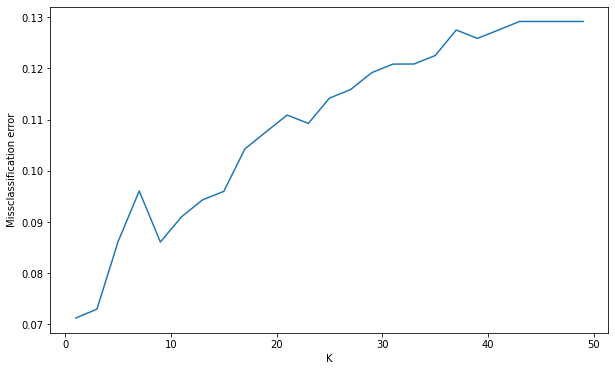

In [38]:
# # for determining the best k
# MSE=[1-x for x in cv_scores]

# optimal_k =neighbors[MSE.index(min(MSE))]
# print(optimal_k)
# plt.figure(figsize=(10,6))
# plt.plot(neighbors,MSE)
# plt.xlabel("K")
# plt.ylabel("Missclassification error")
# plt.show()